### Importy

In [1]:
import os
os.chdir('d:/Projekty/LBN-INZ/CODE/model_training/')
print(os.getcwd())

d:\Projekty\LBN-INZ\CODE\model_training


In [2]:
import pandas as pd
import numpy as np
from scripts.essentials import *
from scripts.plots import *
import pickle

In [3]:
cols_news = ['future', 'influential', 'trustworthy', 'not clickbait',
       'finbert_Score', 'bart_Score', 'vader_Score', 'future_finbert',
       'future_bart', 'future_vader', 'influential_finbert',
       'influential_bart', 'influential_vader', 'trustworthy_finbert',
       'trustworthy_bart', 'trustworthy_vader', 'clickbait_finbert',
       'clickbait_bart', 'clickbait_vader',
       'mean_future','mean_influential', 'mean_trustworthy', 'mean_clickbait' 
         ]

### Połączenie News + FE

In [4]:
prefix = "NFLX"
df_news_path = "NFLX_full_agg_8.csv"

In [5]:
df_news = pd.read_csv("csv/"+prefix+"/"+df_news_path)
df_finance = pd.read_csv("csv/finance_all.csv")

połączenie z newsami + uzupełnienie braków

In [6]:
df_m = create_merged_df(df_finance, df_news, prefix)

dorobienie ramki bez weekendu

In [7]:
df_with_weekends = df_m.copy()
df_without_weekends = df_m.copy()

df_without_weekends = apply_weighted_weekend_news(df_without_weekends,'Date', cols_news, weights=[0.6,0.2,0.2])

wyliczenie cech

In [8]:
df_without_weekends = calculate_technical_indicators(df_without_weekends,'Date',prefix+'_Open',prefix+ '_High',prefix+ '_Low',
    prefix+'_Close',prefix+ '_Volume','^GSPC_Close')
df_with_weekends = calculate_technical_indicators(df_with_weekends,'Date',prefix+'_Open',prefix+ '_High',prefix+ '_Low',
    prefix+'_Close',prefix+ '_Volume','^GSPC_Close',True)

In [9]:
df_without_weekends.describe()

,future,influential,trustworthy,not clickbait,finbert_Score,bart_Score,vader_Score,future_finbert,future_bart,future_vader,...,log_return_gspc_5,log_return_gspc_10,log_return_gspc_20,daily_variation,high_close_pressure,low_open_pressure,low_norm,close_norm,high_norm,open_norm
count,844.000000,844.000000,844.000000,844.000000,844.000000,844.000000,844.000000,844.000000,844.000000,844.000000,...,839.000000,834.000000,824.000000,844.000000,844.000000,844.000000,844.000000,844.000000,844.000000,844.000000
mean,0.307639,0.859943,0.749651,0.279758,-0.018189,0.536044,0.257049,-0.006222,0.183585,0.088333,...,0.001595,0.003340,0.006568,0.032774,0.016069,-0.016307,0.985178,1.001799,1.017799,1.001409
min,0.000000,0.000000,0.000000,0.000000,-0.857271,0.000000,-0.648600,-0.309736,0.000000,-0.241770,...,-0.107802,-0.130239,-0.129153,0.007246,0.000000,-0.133320,0.773796,0.793773,0.842821,0.816802
25%,0.300991,0.955788,0.788186,0.272909,-0.147315,0.487362,0.088951,-0.050171,0.155969,0.026874,...,-0.011387,-0.014255,-0.021634,0.020838,0.005178,-0.022436,0.954536,0.969595,0.988395,0.972933
50%,0.343211,0.968809,0.836816,0.308538,0.000000,0.579987,0.265040,0.000000,0.196920,0.089535,...,0.003315,0.007088,0.014519,0.028268,0.012520,-0.013038,0.986037,1.002599,1.016085,1.001247
75%,0.372041,0.974955,0.873308,0.337757,0.113103,0.667751,0.414083,0.041678,0.233299,0.146384,...,0.016252,0.024355,0.037275,0.040057,0.022652,-0.006160,1.019091,1.038039,1.050769,1.032998
max,0.466300,0.996581,0.996807,0.448209,0.893353,0.988771,0.861067,0.257228,0.397967,0.292486,...,0.070679,0.092059,0.114863,0.147594,0.091803,0.000000,1.134243,1.168080,1.191404,1.159548
std,0.114261,0.297782,0.263147,0.104524,0.227252,0.217349,0.215665,0.080432,0.079473,0.075749,...,0.023981,0.032718,0.043661,0.016739,0.014142,0.014006,0.050563,0.052094,0.048974,0.047636


In [10]:
df_with_weekends.to_csv("csv/"+prefix+"/"+prefix+"_with_weekends.csv", index=False)
df_without_weekends.to_csv("csv/"+prefix+"/"+prefix+"_without_weekends.csv", index=False)

In [11]:
df_without_weekends.columns

Index(['future', 'influential', 'trustworthy', 'not clickbait',
       'finbert_Score', 'bart_Score', 'vader_Score', 'future_finbert',
       'future_bart', 'future_vader', 'influential_finbert',
       'influential_bart', 'influential_vader', 'trustworthy_finbert',
       'trustworthy_bart', 'trustworthy_vader', 'clickbait_finbert',
       'clickbait_bart', 'clickbait_vader', 'Date', '^GSPC_Close',
       '^GSPC_Volume', 'EURUSD=X_Close', 'NFLX_Open', 'NFLX_High', 'NFLX_Low',
       'NFLX_Close', 'NFLX_Volume', 'mean_future', 'mean_influential',
       'mean_trustworthy', 'mean_clickbait', 'norm_rsi_14', 'norm_rsi_gspc_14',
       'norm_slowk_14', 'vwap_14', 'norm_roc_14', 'log_return_1',
       'log_return_5', 'log_return_10', 'log_return_20', 'log_return_gspc_1',
       'log_return_gspc_5', 'log_return_gspc_10', 'log_return_gspc_20',
       'daily_variation', 'high_close_pressure', 'low_open_pressure',
       'low_norm', 'close_norm', 'high_norm', 'open_norm'],
      dtype='object')

In [12]:
close_price_statistics_by_year(df_without_weekends, 'Date', prefix+'_Close')

,Year,Min,Max,Mean,Std,Percentile_25,Percentile_50,Percentile_75,Mean_Abs_Diff_1D,Mean_Abs_Diff_1W,Mean_Abs_Diff_2W,Mean_Abs_Diff_1M,Mean_Abs_Diff_2M
0,2020,469.959991,556.549988,504.183635,22.480649,485.172508,500.110001,522.962494,8.960689,17.753979,25.975766,30.322499,26.401042
1,2021,484.980011,691.690002,558.257508,55.792554,512.400024,542.950012,599.059998,7.220880,17.091112,23.495097,33.782606,41.618392
2,2022,166.369995,597.369995,284.868385,95.084682,216.210003,251.980003,351.792496,8.240770,21.034961,31.478808,47.286115,87.546500
3,2023,292.760010,479.559998,381.517447,50.092151,335.150009,378.880005,428.304993,6.004341,15.760043,24.810212,35.954594,43.080042


### Train Val Test + Normalizacja

In [13]:
df_without_weekends['target_1'] = df_without_weekends['log_return_1'].shift(-1)
df_without_weekends['target_5'] = df_without_weekends['log_return_5'].shift(-5)
df_without_weekends['target_10'] = df_without_weekends['log_return_10'].shift(-10)
df_without_weekends['target_20'] = df_without_weekends['log_return_20'].shift(-20)

In [17]:
train_set, val_set, test_set = split_data(df_without_weekends, 'Date', '2023-07-08', '2023-09-02', start_date_train = '2021-01-01')
print(train_set.shape)
print(val_set.shape)
print(test_set.shape)

(656, 56)
(40, 56)
(60, 56)


In [18]:
cols_min_max = ['^GSPC_Volume', prefix+'_Volume',
'daily_variation', 'high_close_pressure', 'low_open_pressure',
'low_norm', 'close_norm', 'high_norm', 'open_norm']

train_set, scaler_min_max = min_max_scale(train_set,'Date', cols_min_max, train_data=True, scaler=None)
val_set = min_max_scale(val_set,'Date', cols_min_max, train_data=False, scaler=scaler_min_max)
test_set = min_max_scale(test_set,'Date', cols_min_max, train_data=False, scaler=scaler_min_max)

scaler_name = 'scaler_min_max_'+prefix+'.pkl'
with open(scaler_name, 'wb') as file:
    pickle.dump(scaler_min_max, file)

In [16]:
train_set.describe().T

,count,mean,min,25%,50%,75%,max,std
future,656.0,0.342782,0.0,0.314979,0.348873,0.375569,0.445085,0.048278
influential,656.0,0.959748,0.0,0.961178,0.970313,0.975368,0.996581,0.055053
trustworthy,656.0,0.838646,0.0,0.809103,0.847035,0.877987,0.996807,0.065947
not clickbait,656.0,0.312734,0.0,0.288967,0.314047,0.341113,0.448209,0.044799
finbert_Score,656.0,-0.022149,-0.857271,-0.175366,-0.010054,0.127713,0.893353,0.24048
bart_Score,656.0,0.595344,0.0,0.523881,0.594291,0.67584,0.988771,0.123281
vader_Score,656.0,0.281704,-0.6486,0.150631,0.297627,0.427716,0.82608,0.207673
future_finbert,656.0,-0.008026,-0.309736,-0.057078,-0.000477,0.04952,0.257228,0.084513
future_bart,656.0,0.203232,0.0,0.169485,0.201648,0.237959,0.374004,0.050766
future_vader,656.0,0.096729,-0.24177,0.047786,0.100466,0.151711,0.290075,0.072588


In [17]:
train_set.columns

Index(['future', 'influential', 'trustworthy', 'not clickbait',
       'finbert_Score', 'bart_Score', 'vader_Score', 'future_finbert',
       'future_bart', 'future_vader', 'influential_finbert',
       'influential_bart', 'influential_vader', 'trustworthy_finbert',
       'trustworthy_bart', 'trustworthy_vader', 'clickbait_finbert',
       'clickbait_bart', 'clickbait_vader', 'Date', '^GSPC_Close',
       'EURUSD=X_Close', 'NFLX_Open', 'NFLX_High', 'NFLX_Low', 'NFLX_Close',
       'mean_future', 'mean_influential', 'mean_trustworthy', 'mean_clickbait',
       'norm_rsi_14', 'norm_rsi_gspc_14', 'norm_slowk_14', 'vwap_14',
       'norm_roc_14', 'log_return_1', 'log_return_5', 'log_return_10',
       'log_return_20', 'log_return_gspc_1', 'log_return_gspc_5',
       'log_return_gspc_10', 'log_return_gspc_20', 'target_1', 'target_5',
       'target_10', 'target_20', 'minmax_^GSPC_Volume', 'minmax_NFLX_Volume',
       'minmax_daily_variation', 'minmax_high_close_pressure',
       'minmax_lo

In [18]:
train_set.to_csv("csv/"+prefix+"/train_set_full.csv", index=False)
test_set.to_csv("csv/"+prefix+"/test_set_full.csv", index=False)
val_set.to_csv("csv/"+prefix+"/val_set_full.csv", index=False)

### Analiza Targetu

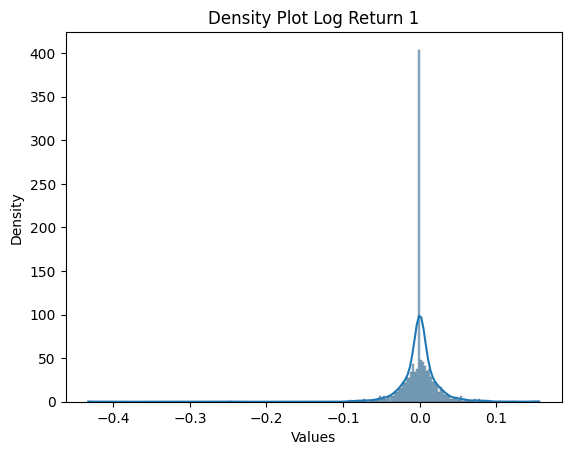

In [14]:
plot_density(df_with_weekends['log_return_1'], title='Density Plot Log Return 1', xlabel='Values')

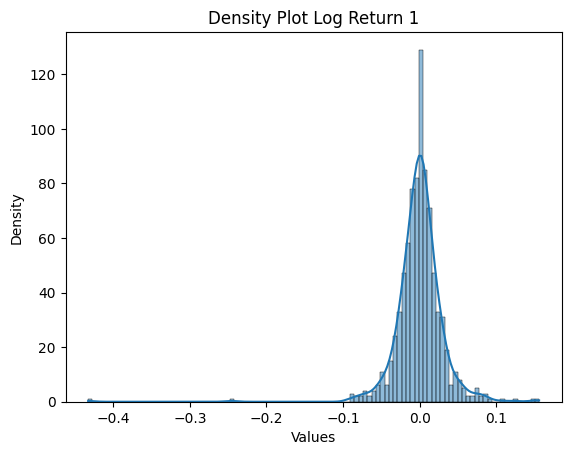

In [15]:
plot_density(df_without_weekends['log_return_1'], title='Density Plot Log Return 1', xlabel='Values')

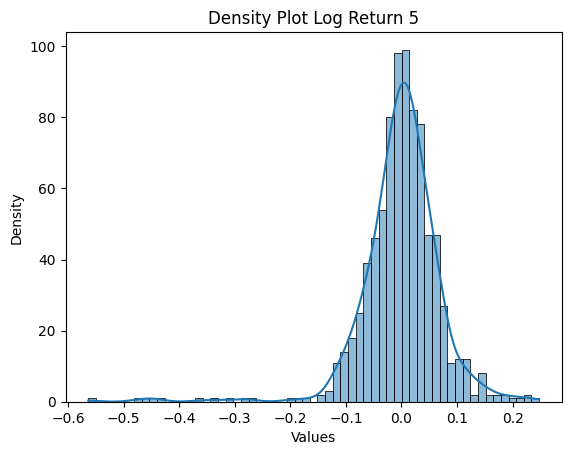

In [16]:
plot_density(df_without_weekends['log_return_5'], title='Density Plot Log Return 5', xlabel='Values')

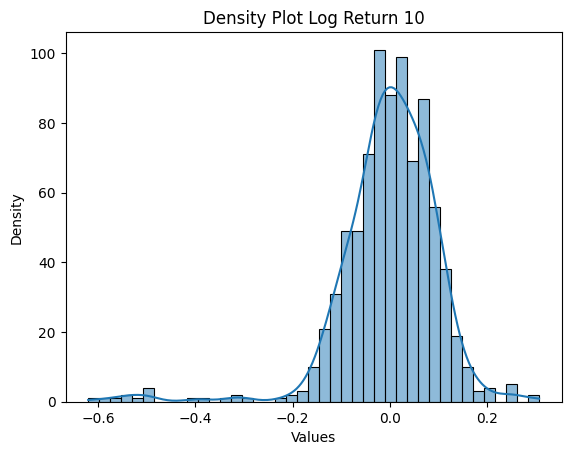

In [17]:
plot_density(df_without_weekends['log_return_10'], title='Density Plot Log Return 10', xlabel='Values')

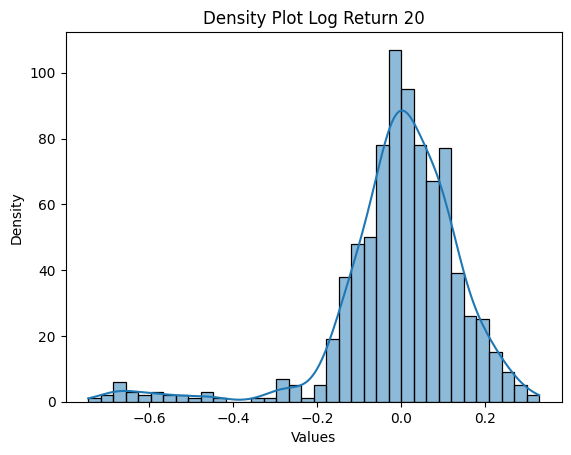

In [18]:
plot_density(df_without_weekends['log_return_20'], title='Density Plot Log Return 20', xlabel='Values')